example: y=x0^2 - x1^2 + x1 - 1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
from scipy.integrate import odeint
% matplotlib inline

300


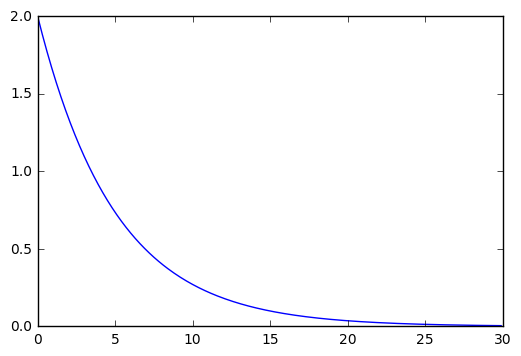

In [10]:
dt = 0.1
x0=2
coef = -0.2
t = np.arange(0,30,dt)
x = odeint(lambda x,t:coef*x,x0,t)
print(len(x))
plt.plot(t,x)

In [11]:
dx = np.gradient(x[:,0],dt)

In [15]:
train_x = x
test_x = x
train_y = dx
test_y = dx
varnames = 'x'
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           comparison=False, transformer=False,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(train_x, train_y)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.81    33230.3177706       15 0.00129929102725 0.00151231900233     46.85s


SymbolicRegressor(comparison=False, const_range=(-1.0, 1.0), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.01,
         population_size=5000, random_state=0, stopping_criteria=0.01,
         tournament_size=20, transformer=False, trigonometric=False,
         verbose=1)

In [17]:
print(est_gp._program)

add(sub(mul(-0.276, X0), mul(-0.080, X0)), mul(sub(X0, -0.496), sub(X0, X0)))


In [24]:
est_gp._program.

1

gplearn.genetic._Program